In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CISC_5450: Math Project/master.csv")
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


## Renaming the Columns

In [ ]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [ ]:
df = df.rename(columns = {'country' : 'COUNTRY', 'year' : 'YEAR', 'sex' : 'SEX', 'age' : 'AGE', 'suicides_no' : 'SUICIDE_NO', 'population' : 'POPULATION', 'suicides/100k pop' : 'SUICIDES/100K_POPULATION', 'country-year' : 'COUNTRY_YEAR',
                          'HDI for year' : 'HDI_FOR_YEAR', ' gdp_for_year ($) ' : 'GDP_FOR_YEAR', 'gdp_per_capita ($)' : 'GDP_PER_CAPITA', 'generation' : 'GENERATION'})

## Checking for Missing Values 

In [ ]:
# Creating a missinng value function 
def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)  
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  
    missing_data = pd.concat([total, percent*100], axis=1, keys=['Total', 'Percent'])  
    return missing_data

missing_check(df)

,Total,Percent
HDI_FOR_YEAR,19456,69.935298
COUNTRY,0,0.000000
YEAR,0,0.000000
SEX,0,0.000000
AGE,0,0.000000
SUICIDE_NO,0,0.000000
POPULATION,0,0.000000
SUICIDES/100K_POPULATION,0,0.000000
COUNTRY_YEAR,0,0.000000
GDP_FOR_YEAR,0,0.000000


## Removing Missing & Unwanted Column

In [ ]:
df.drop(columns= ['HDI_FOR_YEAR', 'COUNTRY_YEAR'], axis = 1, inplace = True) # Removing unwanted & missing columns

df['GDP_FOR_YEAR'] = df['GDP_FOR_YEAR'].str.replace(",", "").astype("int") # Replacing GDP_FOR_YEAR to int type

## Checking for Duplicate Rows

In [ ]:
dups = df.duplicated().sum()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   COUNTRY                   27820 non-null  object 
 1   YEAR                      27820 non-null  int64  
 2   SEX                       27820 non-null  object 
 3   AGE                       27820 non-null  object 
 4   SUICIDE_NO                27820 non-null  int64  
 5   POPULATION                27820 non-null  int64  
 6   SUICIDES/100K_POPULATION  27820 non-null  float64
 7   GDP_FOR_YEAR              27820 non-null  int64  
 8   GDP_PER_CAPITA            27820 non-null  int64  
 9   GENERATION                27820 non-null  object 
dtypes: float64(1), int64(5), object(4)
memory usage: 2.1+ MB


## Global Trend for Suicide Numbers

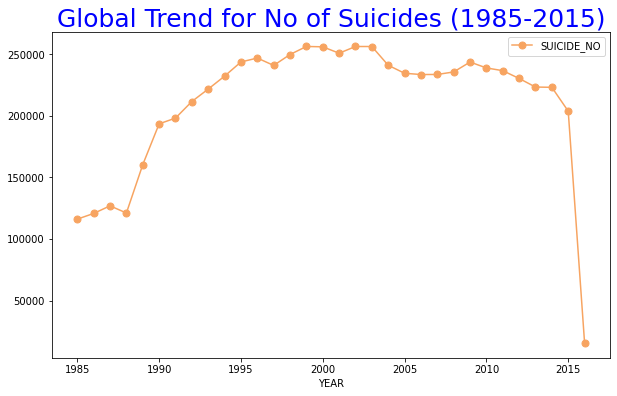

In [ ]:
df[['YEAR','SUICIDE_NO']].groupby(['YEAR']).sum().plot(figsize=(10,6), color='#f7a461', marker='o', markersize=7)
plt.title('Global Trend for No of Suicides (1985-2015)', color='b', fontsize=25, ha='center')
plt.show()

## Global Stats of Suicide by Gender

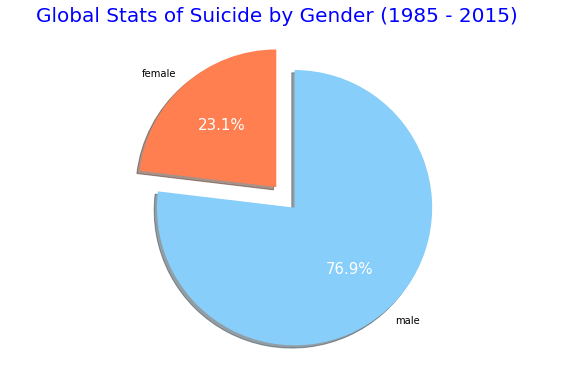

In [ ]:
df_piechart = df.groupby(by=['SEX']).agg({"SUICIDE_NO": ['sum']})
df_piechart.columns = ['TOTAL_SUICIDE']
df_piechart.reset_index(inplace=True)

fig1, ax1 = plt.subplots(figsize=(10,6))
myexplode = [0.2, 0]
wedges, texts, autotexts = ax1.pie(df_piechart['TOTAL_SUICIDE'], labels=df_piechart['SEX'], autopct='%1.1f%%', startangle=90, colors= ['#FF7F50', '#87CEFA'], shadow = True,  explode = myexplode)
ax1.axis('equal')

plt.setp(autotexts, size=15, color="w")
plt.figtext(.5,.91,'Global Stats of Suicide by Gender (1985 - 2015)', color='b', fontsize=20, ha='center')
plt.show()

## Top 15 Countries with High Suicide Numbers

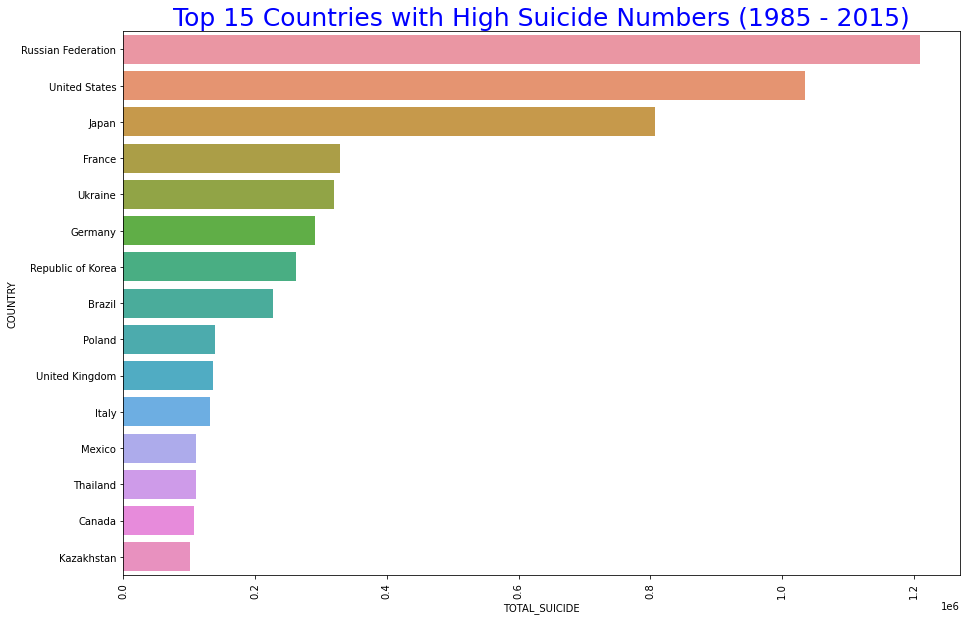

In [ ]:
df_country_top20 = df.groupby(by=['COUNTRY']).agg({'SUICIDE_NO': ['sum']})
df_country_top20.columns = ['TOTAL_SUICIDE']
df_country_top20.reset_index(inplace = True)
df_country_top20 = df_country_top20.sort_values(by = ['TOTAL_SUICIDE'], ascending = False).head(15)

#Plotting top 15 Countries
plt.figure(figsize=(15,10))
sns.barplot(data = df_country_top20, x = 'TOTAL_SUICIDE', y = 'COUNTRY')
plt.xticks(rotation=90)
plt.title('Top 15 Countries with High Suicide Numbers (1985 - 2015)', color='b', fontsize=25, ha='center')
plt.show()

#From this plot we can say that Russia, United States, and Japan have the highest number of Sucide Numbers

## Least 5 Countries with Low Suicide Numbers


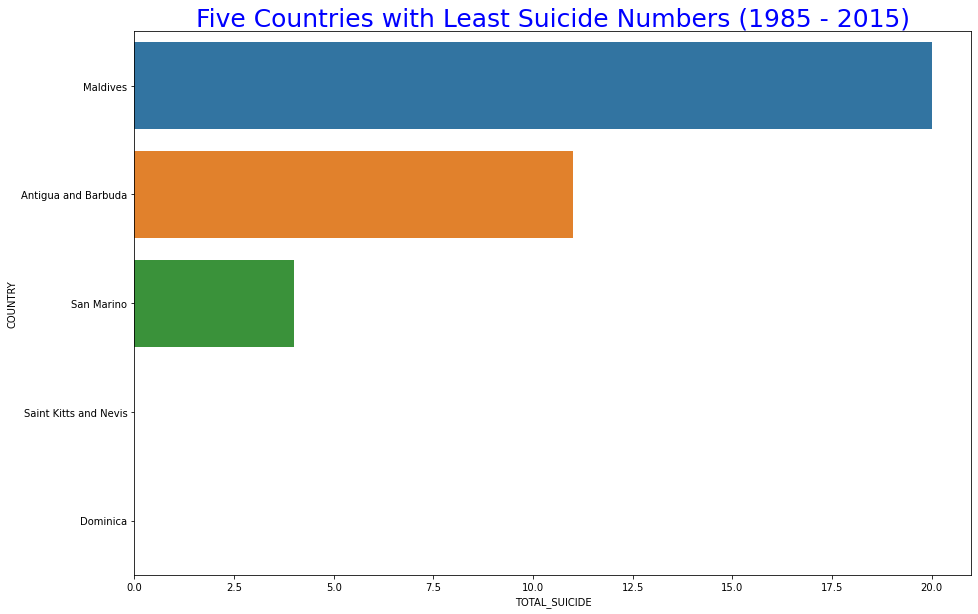

In [ ]:
df_country_least5 = df.groupby(by=['COUNTRY']).agg({'SUICIDE_NO': ['sum']})
df_country_least5.columns = ['TOTAL_SUICIDE']
df_country_least5.reset_index(inplace = True)
df_country_least5 = df_country_least5.sort_values(by = ['TOTAL_SUICIDE'], ascending = False).tail(5)

#Plotting least 5 Countries
plt.figure(figsize=(15,10))
sns.barplot(data = df_country_least5, x = 'TOTAL_SUICIDE', y = 'COUNTRY')
plt.xticks()
plt.title('Five Countries with Least Suicide Numbers (1985 - 2015)', color='b', fontsize=25, ha='center')
plt.show()


## Number of Countries reported Suicides Every year

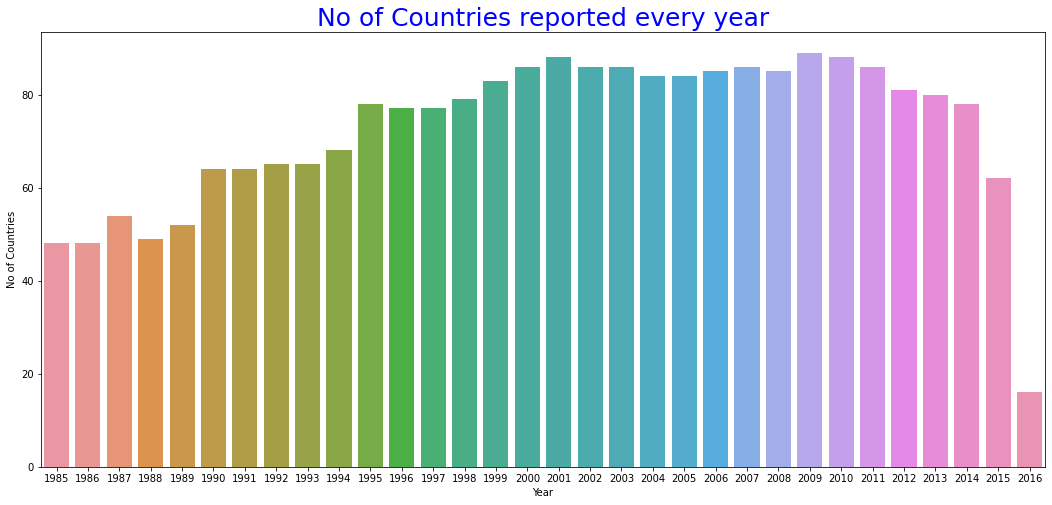

In [ ]:
df_country_count = df[['YEAR','COUNTRY']].groupby(['YEAR']).nunique().reset_index()

#Plotting the number of countries which reported suicide cases every year
plt.figure(figsize=(18,8))
sns.barplot(x = 'YEAR',y = 'COUNTRY', data=df_country_count)
plt.title('No of Countries reported every year', color='b', fontsize=25, ha='center')
plt.xlabel("Year")
plt.ylabel("No of Countries")
plt.show()

## Creating a Table for Russian Federation

In [ ]:
# From the top 15 countries plot we can see that Russia has the highest number of cases.

df_russia = df[df['COUNTRY'] == 'Russian Federation']
df_russia.head()

,COUNTRY,YEAR,SEX,AGE,SUICIDE_NO,POPULATION,SUICIDES/100K_POPULATION,GDP_FOR_YEAR,GDP_PER_CAPITA,GENERATION
20936,Russian Federation,1989,male,75+ years,1393,1349100,103.25,506500173960,3740,G.I. Generation
20937,Russian Federation,1989,male,35-54 years,12030,18058500,66.62,506500173960,3740,Silent
20938,Russian Federation,1989,male,55-74 years,6250,9383700,66.60,506500173960,3740,G.I. Generation
20939,Russian Federation,1989,male,25-34 years,6856,12748800,53.78,506500173960,3740,Boomers
20940,Russian Federation,1989,female,75+ years,1677,4738100,35.39,506500173960,3740,G.I. Generation


### We add few attributes like Carbon Emissions, Total Labour Force & Consumer Price Index from The World Bank Data 
(https://databank.worldbank.org/source/world-development-indicators/Type/TABLE/preview/on#)

In [ ]:
df_russia.to_csv("Russia_Suicides.csv")

In [ ]:
df_russia_updated = pd.read_csv("/content/drive/MyDrive/CISC_5450: Math Project/Russia_Suicides_updated.csv")

In [ ]:
df_russia_updated.head()

,COUNTRY,YEAR,SEX,AGE,SUICIDE_NO,POPULATION,SUICIDES/100K_POPULATION,GDP_FOR_YEAR,GDP_PER_CAPITA,GENERATION,CO2_EMISSIONS,CONSUMER_PRICE_INDEX,TOTAL_LABOUR_FORCE
0,Russian Federation,1989,Male,75+ years,1393,1349100,103.25,506500173960,3740,G.I. Generation,2163530,0.054,74515335
1,Russian Federation,1989,Male,35-54 years,12030,18058500,66.62,506500173960,3740,Silent,2163530,0.054,74515335
2,Russian Federation,1989,Male,55-74 years,6250,9383700,66.60,506500173960,3740,G.I. Generation,2163530,0.054,74515335
3,Russian Federation,1989,Male,25-34 years,6856,12748800,53.78,506500173960,3740,Boomers,2163530,0.054,74515335
4,Russian Federation,1989,Female,75+ years,1677,4738100,35.39,506500173960,3740,G.I. Generation,2163530,0.000,74515335


In [ ]:
df_russia_updated.describe()

,YEAR,SUICIDE_NO,POPULATION,SUICIDES/100K_POPULATION,GDP_FOR_YEAR,GDP_PER_CAPITA,CO2_EMISSIONS,CONSUMER_PRICE_INDEX,TOTAL_LABOUR_FORCE
count,324.000000,324.000000,3.240000e+02,324.000000,3.240000e+02,324.000000,3.240000e+02,324.000000,3.240000e+02
mean,2002.000000,3733.771605,1.139137e+07,34.892377,8.843229e+11,6518.814815,1.691168e+06,51.462667,7.386560e+07
std,7.800929,4613.607105,5.495351e+06,33.205948,6.668425e+11,4974.672820,1.960869e+05,46.576866,1.967357e+06
min,1989.000000,44.000000,1.241100e+06,0.440000,1.959058e+11,1412.000000,1.487970e+06,0.000000,6.886033e+07
25%,1995.000000,924.250000,8.245212e+06,7.512500,3.950773e+11,2844.000000,1.567170e+06,6.332000,7.284541e+07
50%,2002.000000,1526.500000,1.083148e+07,19.125000,5.168143e+11,3773.000000,1.617830e+06,43.132500,7.443274e+07
75%,2009.000000,5737.250000,1.337068e+07,60.650000,1.368401e+12,9987.000000,1.685050e+06,93.590000,7.546293e+07
max,2015.000000,22338.000000,2.304663e+07,117.300000,2.297128e+12,17052.000000,2.163530e+06,152.000000,7.602923e+07


### We do some groupby functions, merge them on basis of year so that plotting can be easy

In [ ]:
df_suicide = pd.DataFrame(df_russia_updated[['YEAR','SUICIDE_NO']].groupby(['YEAR']).sum().reset_index())

In [ ]:
df_population = pd.DataFrame(df_russia_updated[['YEAR','POPULATION']].groupby(['YEAR']).sum().reset_index())

In [ ]:
df_gdp = df_russia_updated[['YEAR','GDP_PER_CAPITA']].groupby(['YEAR']).mean()

In [ ]:
df_co2 = df_russia_updated[['YEAR','CO2_EMISSIONS']].groupby(['YEAR']).mean()

In [ ]:
df_cpi = df_russia_updated[['YEAR','CONSUMER_PRICE_INDEX']].groupby(['YEAR']).mean()

In [ ]:
df_labour = df_russia_updated[['YEAR','TOTAL_LABOUR_FORCE']].groupby(['YEAR']).mean()

In [ ]:
df_sel = pd.merge(df_suicide, df_population, on = 'YEAR')

In [ ]:
df_sel2 = pd.merge(df_gdp, df_co2, on = 'YEAR')

In [ ]:
df_sel3 = pd.merge(df_cpi, df_labour, on = 'YEAR')

In [ ]:
df_1 = pd.merge(df_sel, df_sel2, on = 'YEAR')

In [ ]:
df_merged = pd.merge(df_1, df_sel3, on = 'YEAR')

In [ ]:
df_merged.head()

,YEAR,SUICIDE_NO,POPULATION,GDP_PER_CAPITA,CO2_EMISSIONS,CONSUMER_PRICE_INDEX,TOTAL_LABOUR_FORCE
0,1989,37921,135443800,3740.0,2163530.0,0.027,74515335.0
1,1990,39028,136398200,3789.0,2163530.0,0.027,74840658.0
2,1991,39281,137283000,3773.0,2136440.0,0.027,75175592.0
3,1992,45923,138118900,3333.0,2030810.0,0.027,75761461.0
4,1993,55846,137692800,3160.0,1880250.0,0.761,73935343.0


## Time Series Plots for Russia

### 1. Suicide Numbers for Russia (1989 - 2015)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


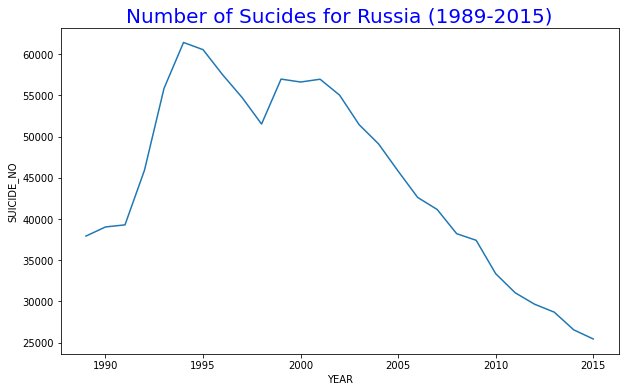

In [ ]:
#Plotting Suicide Numbers
plt.figure(figsize = (10,6))
sns.lineplot(df_merged.YEAR,df_merged.SUICIDE_NO)
plt.title("Number of Sucides for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.show()

### 2. Population for Russia (1989 - 2015)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


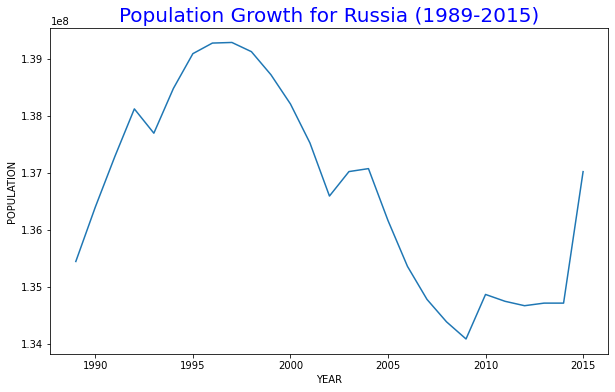

In [ ]:
#Plotting Population
plt.figure(figsize = (10,6))
sns.lineplot(df_merged.YEAR,df_merged.POPULATION)
plt.title("Population Growth for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.show()

### 3. GDP Per Capita for Russia (1989 - 2015)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


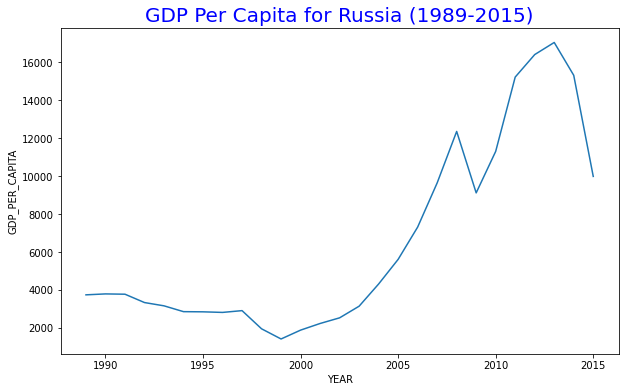

In [ ]:
#Plotting GDP Per Capita
plt.figure(figsize = (10,6))
sns.lineplot(df_merged.YEAR,df_merged.GDP_PER_CAPITA)
plt.title("GDP Per Capita for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.show()

### 4. Carbon Emissions(in kT) for Russia (1989 - 2015)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


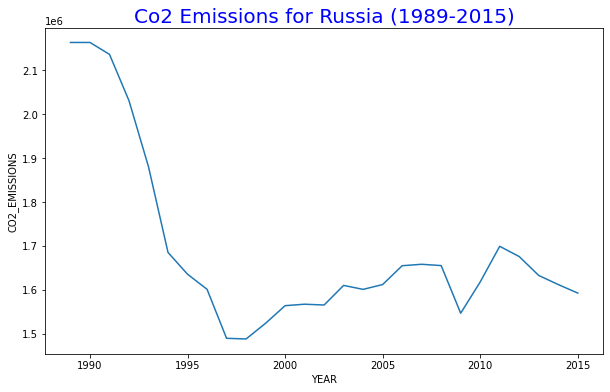

In [ ]:
#Plotting CO2 Emissions
plt.figure(figsize = (10,6))
sns.lineplot(df_merged.YEAR,df_merged.CO2_EMISSIONS)
plt.title("Co2 Emissions for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.show()

### 5. Consumer Price Index for Russia (1989 - 2015)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


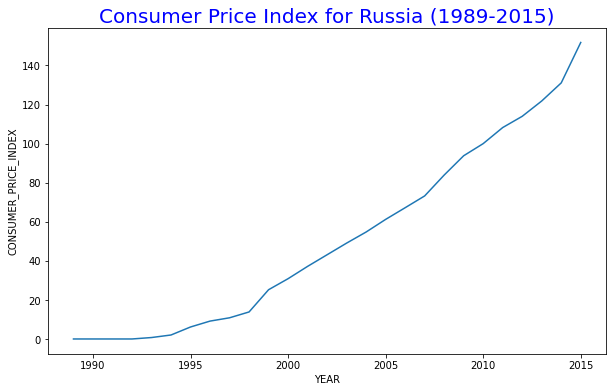

In [ ]:
#Plotting CPI
plt.figure(figsize = (10,6))
sns.lineplot(df_merged.YEAR,df_merged.CONSUMER_PRICE_INDEX)
plt.title("Consumer Price Index for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.show()

### 6. Total Labour Force for Russia (1989 - 2015)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


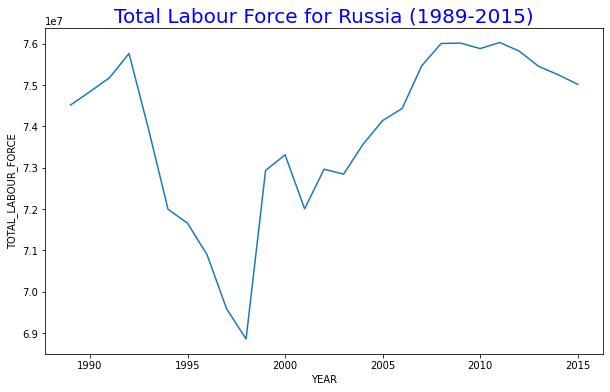

In [ ]:
#Plotting Total Labour Force
plt.figure(figsize = (10,6))
sns.lineplot(df_merged.YEAR,df_merged.TOTAL_LABOUR_FORCE)
plt.title("Total Labour Force for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.show()

In [ ]:
df_scaled = df_merged.copy() 

In [ ]:
from scipy.stats import zscore
df_scaled[['SUICIDE_NO', 'POPULATION', 'GDP_PER_CAPITA', 'CO2_EMISSIONS','CONSUMER_PRICE_INDEX', 'TOTAL_LABOUR_FORCE']] = df_scaled[['SUICIDE_NO', 'POPULATION', 'GDP_PER_CAPITA', 'CO2_EMISSIONS',
       'CONSUMER_PRICE_INDEX', 'TOTAL_LABOUR_FORCE']].apply(zscore)

#### a. Time Series Plot for No of Suicides & Population for Russia (1989 - 2015)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


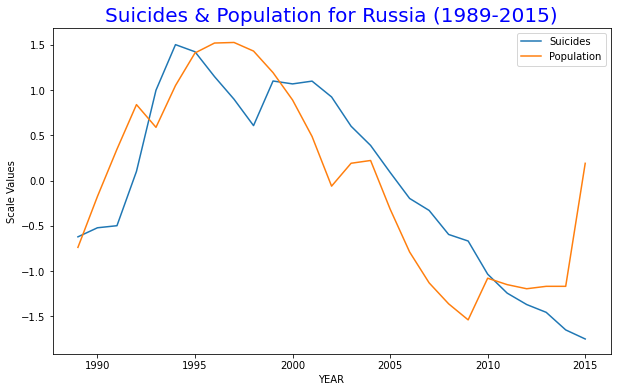

In [ ]:
# Plotting Suicides & Population for Russia (1989 - 2015)

plt.figure(figsize = (10,6))
sns.lineplot(df_scaled.YEAR,df_scaled.SUICIDE_NO)
sns.lineplot(df_scaled.YEAR,df_scaled.POPULATION)
plt.title("Suicides & Population for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.legend(labels=['Suicides', 'Population'])
plt.ylabel("Scale Values")
plt.show()

#### b. Time Series Plot for No of Suicides & GDP Per Capita for Russia (1989 - 2015)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


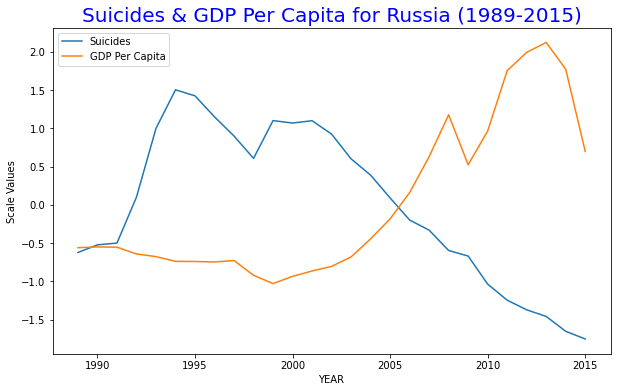

In [ ]:
# Plotting Suicides & GDP Per Capita for Russia (1989 - 2015)

plt.figure(figsize = (10,6))
sns.lineplot(df_scaled.YEAR,df_scaled.SUICIDE_NO)
sns.lineplot(df_scaled.YEAR,df_scaled.GDP_PER_CAPITA)
plt.title("Suicides & GDP Per Capita for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.legend(labels=['Suicides', 'GDP Per Capita'])
plt.ylabel("Scale Values")
plt.show()

#### c. Time Series Plot for No of Suicides & Co2 Emissions for Russia (1989 - 2015)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


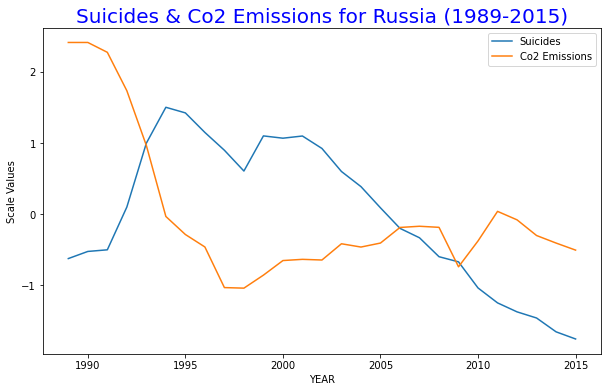

In [ ]:
# Plotting Suicides & Co2 Emissions for Russia (1989 - 2015)

plt.figure(figsize = (10,6))
sns.lineplot(df_scaled.YEAR,df_scaled.SUICIDE_NO)
sns.lineplot(df_scaled.YEAR,df_scaled.CO2_EMISSIONS)
plt.title("Suicides & Co2 Emissions for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.legend(labels=['Suicides', 'Co2 Emissions'])
plt.ylabel("Scale Values")
plt.show()

#### d. Time Series Plot for No of Suicides & Consumer Price Index for Russia (1989 - 2015)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


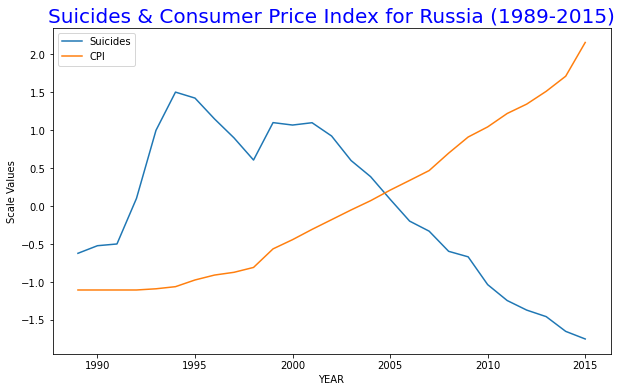

In [ ]:
# Plotting Suicides & Consumer Price Index for Russia (1989 - 2015)

plt.figure(figsize = (10,6))
sns.lineplot(df_scaled.YEAR,df_scaled.SUICIDE_NO)
sns.lineplot(df_scaled.YEAR,df_scaled.CONSUMER_PRICE_INDEX)
plt.title("Suicides & Consumer Price Index for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.legend(labels=['Suicides', 'CPI'])
plt.ylabel("Scale Values")
plt.show()

#### e. Time Series Plot for No of Suicides & Total Labor Force for Russia (1989 - 2015)

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


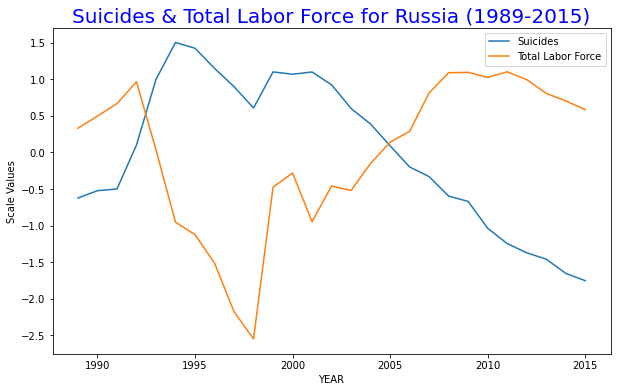

In [ ]:
# Plotting Suicides & Total Labor Force for Russia (1989 - 2015)

plt.figure(figsize = (10,6))
sns.lineplot(df_scaled.YEAR,df_scaled.SUICIDE_NO)
sns.lineplot(df_scaled.YEAR,df_scaled.TOTAL_LABOUR_FORCE)
plt.title("Suicides & Total Labor Force for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.legend(labels=['Suicides', 'Total Labor Force'])
plt.ylabel("Scale Values")
plt.show()

## Cumulative Plots

#### a. Suicides

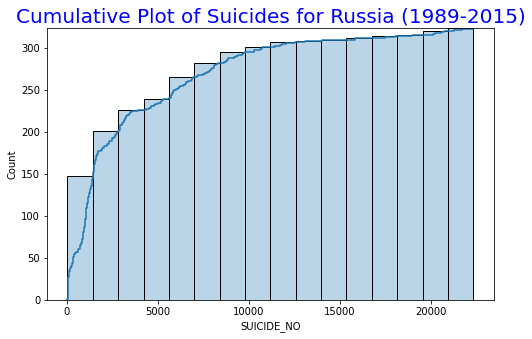

In [ ]:
# Cumulative plot for Suicide - Russia

fig = plt.subplots(figsize=(8,5))
stat = "count"
sns.histplot(x='SUICIDE_NO', data=df_russia_updated, stat=stat, cumulative=True, alpha=.3)
sns.ecdfplot(x='SUICIDE_NO', data=df_russia_updated, stat=stat)
plt.title("Cumulative Plot of Suicides for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.show()

#### b. Cumulative plot for Population - Russia

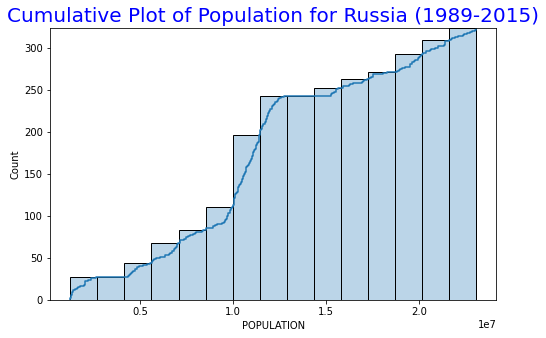

In [ ]:
# Cumulative plot for Population - Russia

fig = plt.subplots(figsize=(8,5))
stat = "count"
sns.histplot(x='POPULATION', data=df_russia_updated, stat=stat, cumulative=True, alpha=.3)
sns.ecdfplot(x='POPULATION', data=df_russia_updated, stat=stat)
plt.title("Cumulative Plot of Population for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.show()

#### c. Cumulative plot for GDP - Russia

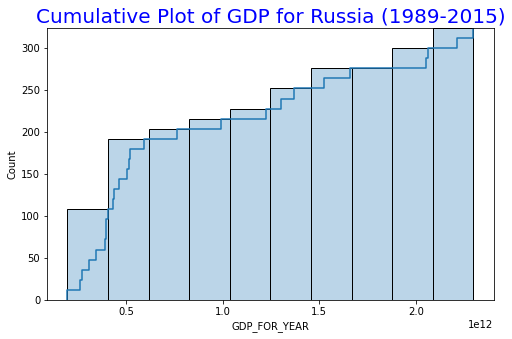

In [ ]:
# Cumulative plot for GDP - Russia

fig = plt.subplots(figsize=(8,5))
stat = "count"
sns.histplot(x='GDP_FOR_YEAR', data=df_russia_updated, stat=stat, cumulative=True, alpha=.3)
sns.ecdfplot(x='GDP_FOR_YEAR', data=df_russia_updated, stat=stat)
plt.title("Cumulative Plot of GDP for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.show()

#### d. Cumulative plot for Co2 Emissions

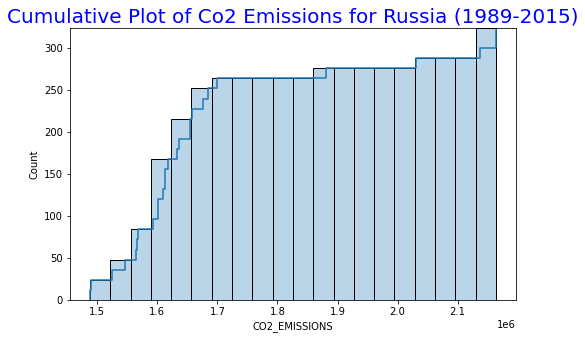

In [ ]:
# Cumulative plot for Co2 Emissions - Russia

fig = plt.subplots(figsize=(8,5))
stat = "count"
sns.histplot(x='CO2_EMISSIONS', data=df_russia_updated, stat=stat, cumulative=True, alpha=.3)
sns.ecdfplot(x='CO2_EMISSIONS', data=df_russia_updated, stat=stat)
plt.title("Cumulative Plot of Co2 Emissions for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.show()

#### e. Cumulative plot for Consumer Price Index - Russia

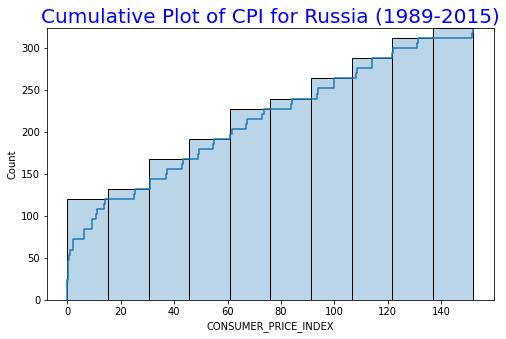

In [ ]:
# Cumulative plot for Consumer Price Index - Russia

fig = plt.subplots(figsize=(8,5))
stat = "count"
sns.histplot(x='CONSUMER_PRICE_INDEX', data=df_russia_updated, stat=stat, cumulative=True, alpha=.3)
sns.ecdfplot(x='CONSUMER_PRICE_INDEX', data=df_russia_updated, stat=stat)
plt.title("Cumulative Plot of CPI for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.show()

#### f. Cumulative Plot for Total Labor Force - Russia

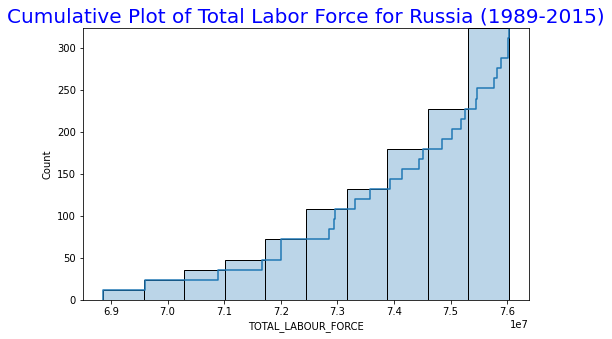

In [ ]:
# Cumulative plot for Total Labor Force - Russia

fig = plt.subplots(figsize=(8,5))
stat = "count"
sns.histplot(x='TOTAL_LABOUR_FORCE', data=df_russia_updated, stat=stat, cumulative=True, alpha=.3)
sns.ecdfplot(x='TOTAL_LABOUR_FORCE', data=df_russia_updated, stat=stat)
plt.title("Cumulative Plot of Total Labor Force for Russia (1989-2015)", color='b', fontsize=20, ha='center')
plt.show()

## Rate of Change of Suicide

In [ ]:
df_copy = df_merged.copy()

In [ ]:
df_copy['SUICIDE_NO'] = df_copy['SUICIDE_NO'].pct_change()

In [ ]:
df_copy['GDP_PER_CAPITA'] = df_copy['GDP_PER_CAPITA'].pct_change()

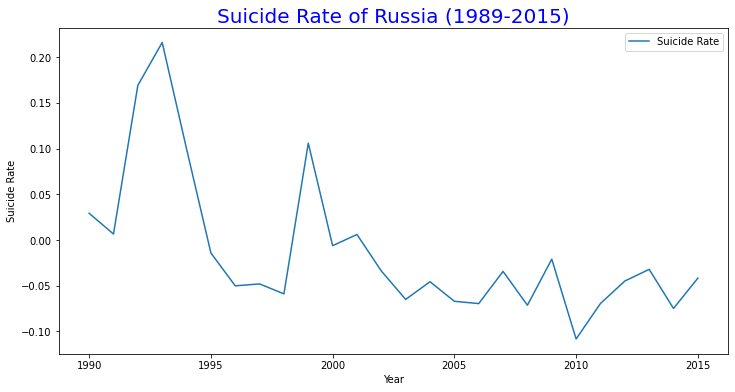

In [ ]:
# Plotting Rate of Change for Suicides

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_copy['YEAR'], df_copy['SUICIDE_NO'], label = "Suicide Rate")
plt.title('Suicide Rate of Russia (1989-2015)', color='b', fontsize=20, ha='center')
plt.ylabel("Suicide Rate")
plt.xlabel("Year")
plt.legend()
plt.show()

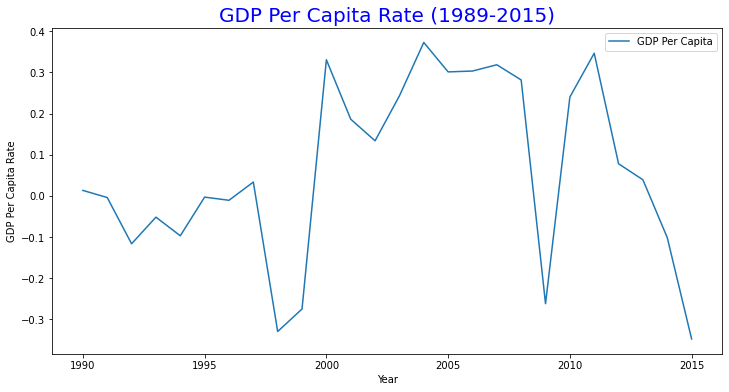

In [ ]:
# Plotting Rate of Change for GDP Per Capita

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(df_copy['YEAR'], df_copy['GDP_PER_CAPITA'], label = "GDP Per Capita")
plt.title('GDP Per Capita Rate (1989-2015)', color='b', fontsize=20, ha='center')
plt.ylabel("GDP Per Capita Rate")
plt.xlabel("Year")
plt.legend()
plt.show()

## Scatter Plot for Suicides V/s Other Features

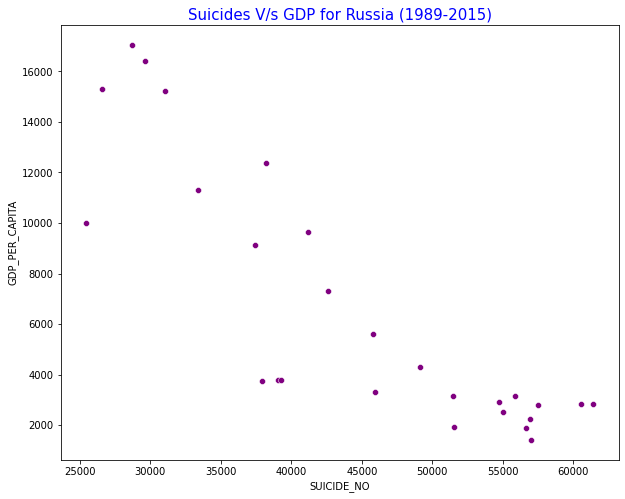

In [ ]:
# Scatter Plot for Suicides V/s GDP
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="SUICIDE_NO", y="GDP_PER_CAPITA", data=df_merged, color='purple')
plt.title('Suicides V/s GDP for Russia (1989-2015)', color='b', fontsize=15, ha='center')
plt.show()

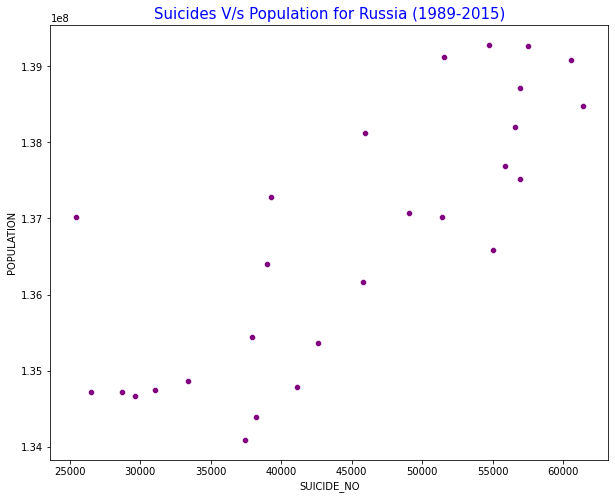

In [ ]:
# Scatter Plot for Suicides V/s Population
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="SUICIDE_NO", y="POPULATION", data=df_merged, color='purple')
plt.title('Suicides V/s Population for Russia (1989-2015)', color='b', fontsize=15, ha='center')
plt.show()

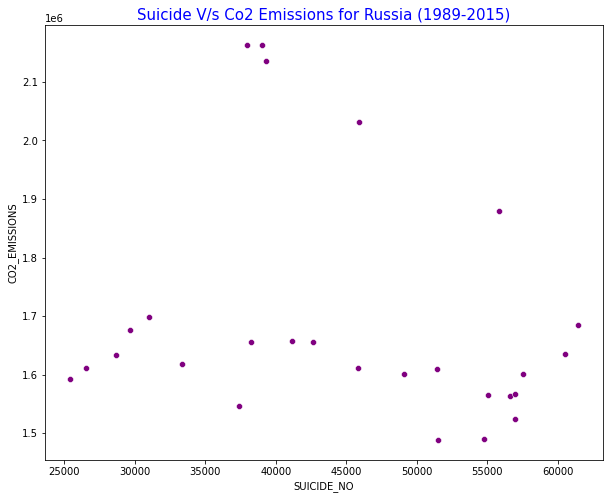

In [ ]:
# Scatter Plot for Suicides V/s Co2 Emissions
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="SUICIDE_NO", y="CO2_EMISSIONS", data=df_merged, color='purple')
plt.title('Suicide V/s Co2 Emissions for Russia (1989-2015)', color='b', fontsize=15, ha='center')
plt.show()

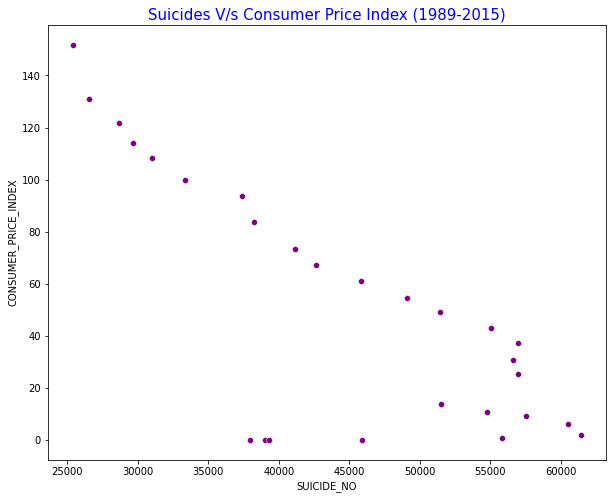

In [ ]:
# Scatter Plot for Suicides V/s Consumer Price Index
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="SUICIDE_NO", y="CONSUMER_PRICE_INDEX", data=df_merged, color='purple')
plt.title('Suicides V/s Consumer Price Index (1989-2015)', color='b', fontsize=15, ha='center')
plt.show()

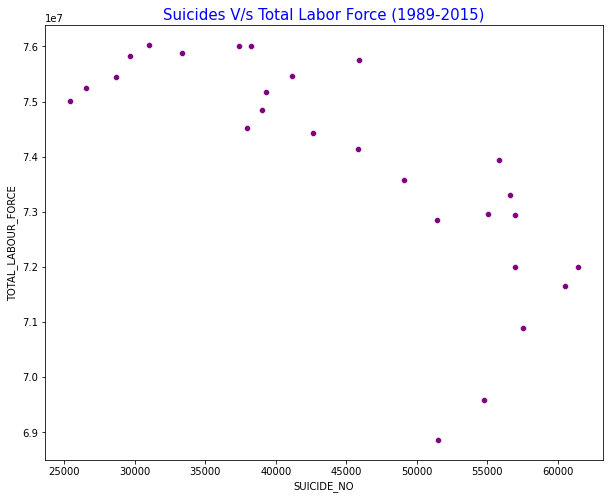

In [ ]:
# Scatter Plot for Suicides V/s Total Labor Force
f, ax = plt.subplots(1,1, figsize=(10,8))
ax = sns.scatterplot(x="SUICIDE_NO", y="TOTAL_LABOUR_FORCE", data=df_merged, color='purple')
plt.title('Suicides V/s Total Labor Force (1989-2015)', color='b', fontsize=15, ha='center')
plt.show()

## Heatmap of Correlations

In [ ]:
df_russia_updated.columns

Index(['COUNTRY', 'YEAR', 'SEX', 'AGE', 'SUICIDE_NO', 'POPULATION',
       'SUICIDES/100K_POPULATION', 'GDP_FOR_YEAR', 'GDP_PER_CAPITA',
       'GENERATION', 'CO2_EMISSIONS', 'CONSUMER_PRICE_INDEX',
       'TOTAL_LABOUR_FORCE'],
      dtype='object')

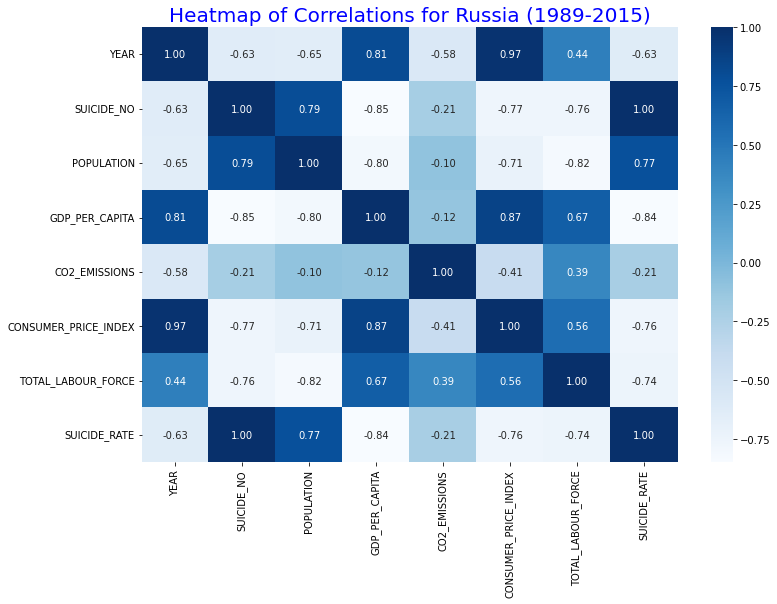

In [ ]:
corr = df_merged.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='Blues',xticklabels='auto', yticklabels='auto')
plt.title('Heatmap of Correlations for Russia (1989-2015)', color='b', fontsize = 20, ha='center')
plt.xticks(rotation=90);
plt.show()

## Bar Plots

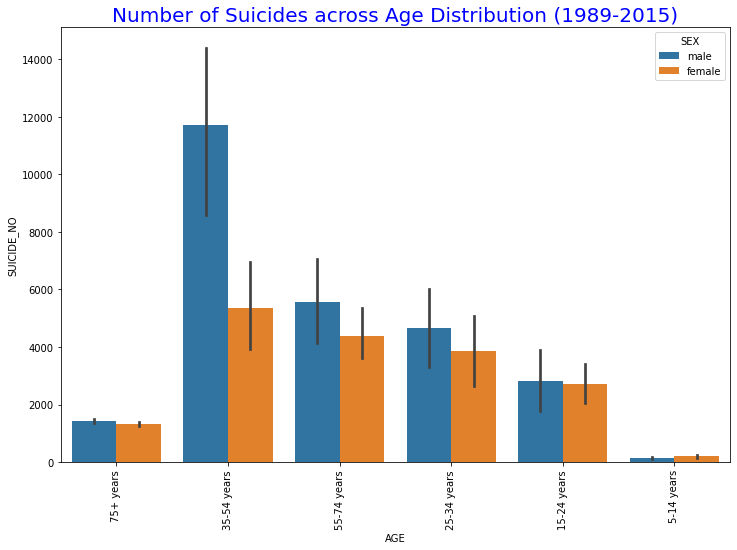

In [ ]:
from scipy.stats.morestats import sort
# Plotting Number of Suicides across Age Distribution

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=df_russia_updated['AGE'], y=df_russia_updated['SUICIDE_NO'], hue = df['SEX'])
plt.xticks(rotation=90);
plt.title('Number of Suicides across Age Distribution (1989-2015)', color='b', fontsize = 20, ha='center')
plt.show()

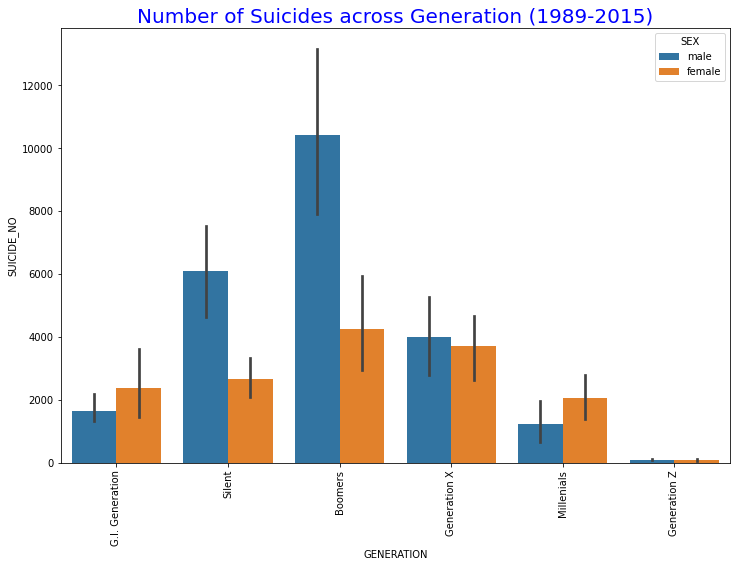

In [ ]:
# Plotting Number of Suicides across Generation

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x=df_russia_updated['GENERATION'], y=df_russia_updated['SUICIDE_NO'], hue = df['SEX'])
plt.xticks(rotation=90);
plt.title('Number of Suicides across Generation (1989-2015)', color='b', fontsize = 20, ha='center')
plt.show()

In [ ]:
gender = df_russia_updated[['SEX','SUICIDE_NO']].groupby(['SEX']).sum().reset_index()

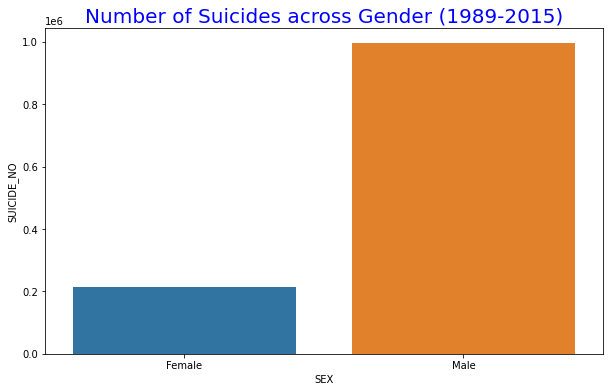

In [ ]:
# Plotting Suicides across Gender for Russia

fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=gender['SEX'], y=gender['SUICIDE_NO'])
plt.title('Number of Suicides across Gender (1989-2015)', color='b', fontsize = 20, ha='center')
plt.show()

## Assigning all the countries to their respective continents for plotting suicide numbers across continents

In [ ]:
df['COUNTRY'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [ ]:
df["Continents"] = 0

df.loc[df["COUNTRY"] == "Albania", "Continents"] = "Europe"
df.loc[df["COUNTRY"]  == "Antigua and Barbuda", "Continents"] = "North America"
df.loc[df["COUNTRY"]  == "Argentina", "Continents"] = "South America"
df.loc[df["COUNTRY"]  == "Armenia", "Continents"] = "Asia"
df.loc[df["COUNTRY"]  == "Aruba", "Continents"] = "South America"
df.loc[df["COUNTRY"]  == "Australia", "Continents"] = "Oceania"
df.loc[df["COUNTRY"] == "Austria", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Azerbaijan", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Bahamas", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Bahrain", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Barbados", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Belarus", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Belgium", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Belize", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Bosnia and Herzegovina", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Brazil", "Continents"] = "South America"
df.loc[df["COUNTRY"] == "Bulgaria", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Cabo Verde", "Continents"] = "Africa"
df.loc[df["COUNTRY"] == "Canada", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Chile", "Continents"] = "South America"
df.loc[df["COUNTRY"] == "Colombia", "Continents"] = "South America"
df.loc[df["COUNTRY"] == "Costa Rica", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Croatia", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Cuba", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Cyprus", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Czech Republic", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Denmark", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Dominica", "Continents"] = "North America"

df.loc[df["COUNTRY"] == "Ecuador", "Continents"] = "South America"
df.loc[df["COUNTRY"] == "El Salvador", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Estonia", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Fiji", "Continents"] = "Oceania"
df.loc[df["COUNTRY"] == "Finland", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "France", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Georgia", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Germany", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Greece", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Grenada", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Guatemala", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Guyana", "Continents"] = "South America"
df.loc[df["COUNTRY"] == "Hungary", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Iceland", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Ireland", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Israel", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Italy", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Jamaica", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Japan", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Kazakhstan", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Kiribati", "Continents"] = "Oceania"
df.loc[df["COUNTRY"] == "Kuwait", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Kyrgyzstan", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Latvia", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Lithuania", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Luxembourg", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Macau", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Maldives", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Malta", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Mauritius", "Continents"] = "Africa"
df.loc[df["COUNTRY"] == "Mexico", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Mongolia", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Montenegro", "Continents"] = "Europe"


df.loc[df["COUNTRY"] == "Netherlands", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "New Zealand", "Continents"] = "Oceania"
df.loc[df["COUNTRY"] == "Nicaragua", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Norway", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Oman", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Panama", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Paraguay", "Continents"] = "South America"
df.loc[df["COUNTRY"] == "Philippines", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Poland", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Portugal", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Puerto Rico", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Qatar", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Republic of Korea", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Romania", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Russian Federation", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Saint Kitts and Nevis", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Saint Lucia", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Saint Vincent and Grenadines","Continents"] = "North America"
df.loc[df["COUNTRY"] == "San Marino", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Serbia", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Seychelles", "Continents"] = "Africa"
df.loc[df["COUNTRY"] == "Singapore", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Slovakia", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Slovenia", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "South Africa", "Continents"] = "Africa"
df.loc[df["COUNTRY"] == "Spain", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Sri Lanka", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Suriname", "Continents"] = "South America"
df.loc[df["COUNTRY"] == "Sweden", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Switzerland", "Continents"] = "Europe"


df.loc[df["COUNTRY"] == "Thailand", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Trinidad and Tobago", "Continents"] = "South America"
df.loc[df["COUNTRY"] == "Turkey", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "Turkmenistan", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "Ukraine", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "United Arab Emirates", "Continents"] = "Asia"
df.loc[df["COUNTRY"] == "United Kingdom", "Continents"] = "Europe"
df.loc[df["COUNTRY"] == "United States", "Continents"] = "North America"
df.loc[df["COUNTRY"] == "Uruguay", "Continents"] = "South America"
df.loc[df["COUNTRY"] == "Uzbekistan", "Continents"] = "Asia"

In [ ]:
df = df.rename(columns = {'Continents' : 'CONTINENTS'})
df.head()

,COUNTRY,YEAR,SEX,AGE,SUICIDE_NO,POPULATION,SUICIDES/100K_POPULATION,GDP_FOR_YEAR,GDP_PER_CAPITA,GENERATION,CONTINENTS
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X,Europe
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent,Europe
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X,Europe
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation,Europe
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers,Europe


## Number of Suicides Across Continents (1985-2015)

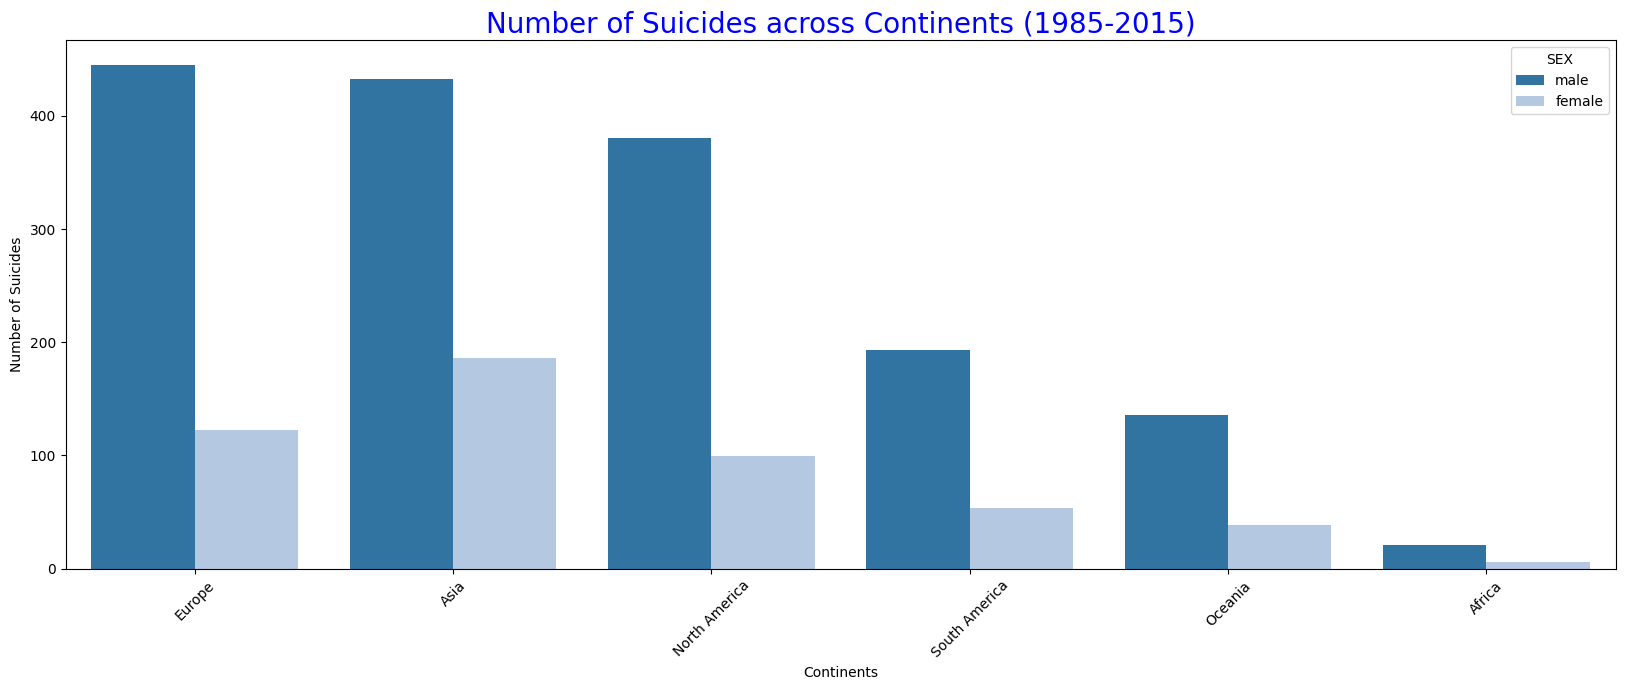

In [ ]:
plt.figure(figsize=(20, 7), dpi=100)
plt.xticks(rotation=(90))
sns.barplot(data=df.groupby(["CONTINENTS","SEX"], as_index=False).mean().sort_values(by="SUICIDE_NO", ascending=False), 
            x="CONTINENTS", y="SUICIDE_NO", hue = "SEX", palette="tab20")
plt.xlabel("Continents")
plt.ylabel("Number of Suicides")
plt.xticks(rotation=45);
plt.title('Number of Suicides across Continents (1985-2015)', color='b', fontsize=20, ha='center')
plt.show()

## Histogram

#### a. Suicide Numbers for Russia

/usr/local/lib/python3.8/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


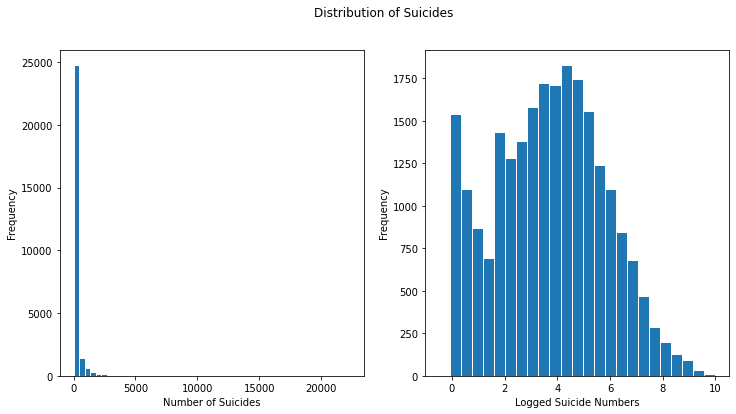

In [ ]:
ax1=plt.subplot(1,2,1)
df['SUICIDE_NO'].plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax1.set_xlabel("Number of Suicides")

ax2=plt.subplot(1,2,2)
np.log(df['SUICIDE_NO']).plot.hist(bins=25, edgecolor="white", figsize=(12,6), range=[-0.5, 10])
ax2.set_xlabel("Logged Suicide Numbers")
plt.suptitle("Distribution of Suicides")
plt.show()

#### b. GDP Per Capita Distribution

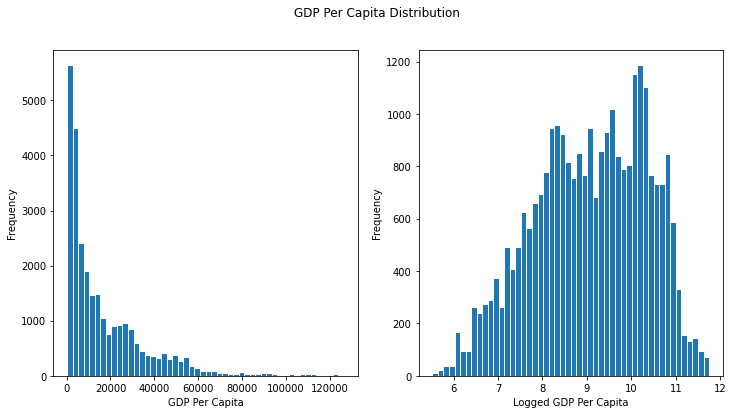

In [ ]:
ax1=plt.subplot(1,2,1)
df['GDP_PER_CAPITA'].plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax1.set_xlabel("GDP Per Capita")

ax2=plt.subplot(1,2,2)
np.log(df['GDP_PER_CAPITA']).plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax2.set_xlabel("Logged GDP Per Capita")
plt.suptitle("GDP Per Capita Distribution")
plt.show()

#### c. Population Distribution

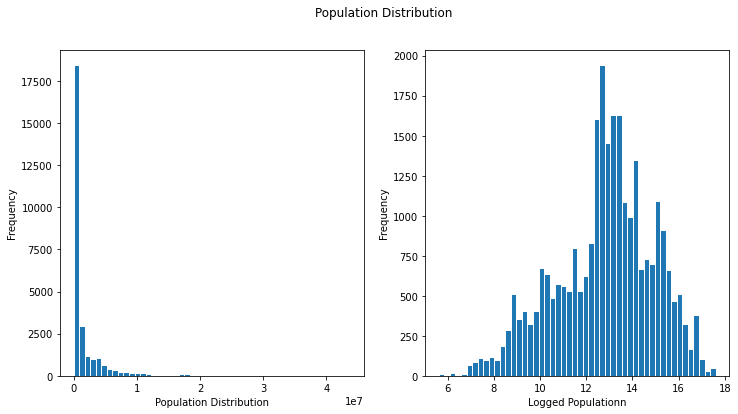

In [ ]:
ax1=plt.subplot(1,2,1)
df['POPULATION'].plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax1.set_xlabel("Population Distribution")

ax2=plt.subplot(1,2,2)
np.log(df['POPULATION']).plot.hist(bins=50, edgecolor="white", figsize=(12,6))
ax2.set_xlabel("Logged Populationn")
plt.suptitle("Population Distribution")
plt.show()

### Scatter plot for Top 10 GDP Countries and Suicides

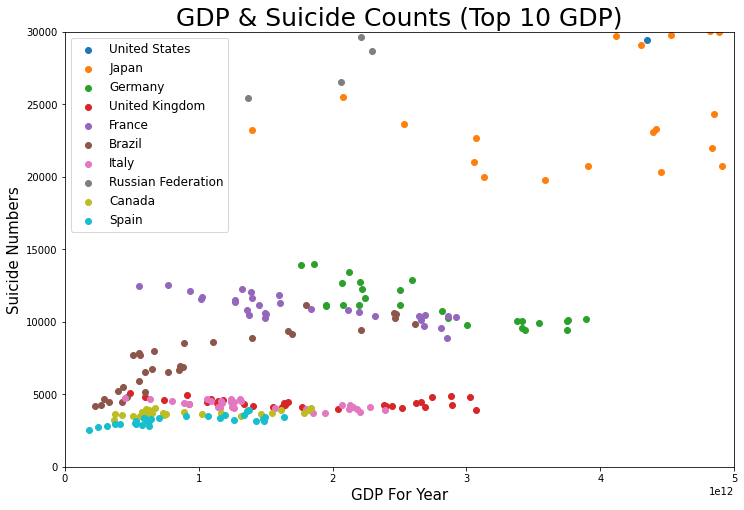

In [ ]:
#Plotting Scatter Plot & Suicide Numbers for Top 10 GDP Countries

country_year_gdp = pd.DataFrame(df.groupby(['COUNTRY', 'YEAR', 'GDP_FOR_YEAR'])['SUICIDE_NO'].sum()).reset_index()
top10_gdp = country_year_gdp.groupby('COUNTRY')['GDP_FOR_YEAR'].max().sort_values(ascending=False).index[:10]


plt.figure(figsize=(12,8))

for country in top10_gdp:
    plt.scatter(country_year_gdp[country_year_gdp['COUNTRY'] == country]['GDP_FOR_YEAR'],country_year_gdp[country_year_gdp['COUNTRY'] == country]['SUICIDE_NO'],
                label=country)

plt.title('GDP & Suicide Counts (Top 10 GDP)', fontsize=25)
plt.xlabel('GDP For Year', fontsize=15)
plt.ylabel('Suicide Numbers', fontsize=15)
plt.xlim(0, 5_000_000_000_000)
plt.ylim(0, 30000)

plt.legend(fontsize=12)
plt.show()

### Hypothesis Testing

Calculate mean and median of suicide rates after grouping them by country and sort the results. This will give us the most suicidal country at the top.

In [ ]:
suicide_mean_by_country=pd.DataFrame(df.groupby(['COUNTRY'])['SUICIDES/100K_POPULATION'].mean())
suicide_mean_by_country = suicide_mean_by_country.sort_values(by='SUICIDES/100K_POPULATION', ascending=False)
suicide_mean_by_country

,SUICIDES/100K_POPULATION
COUNTRY,
Lithuania,40.415573
Sri Lanka,35.295152
Russian Federation,34.892377
Hungary,32.761516
Belarus,31.075913
...,...
Oman,0.736111
Antigua and Barbuda,0.552901
Jamaica,0.521765


In [ ]:
suicide_median_by_country=pd.DataFrame(df.groupby(['COUNTRY'])['SUICIDES/100K_POPULATION'].quantile(0.5))
suicide_median_by_country = suicide_median_by_country.sort_values(by='SUICIDES/100K_POPULATION', ascending=False)
suicide_median_by_country

,SUICIDES/100K_POPULATION
COUNTRY,
Sri Lanka,22.990
Lithuania,22.910
Russian Federation,19.125
Latvia,18.160
Hungary,17.785
...,...
Saint Kitts and Nevis,0.000
Qatar,0.000
Montenegro,0.000


We perform hypothesis testing because when ranking by mean, Lithuania comes first with significantly higher value, but when ranked by median Sri Lanka comes on top of Lithuania by a very small margin.

If the hypothesis test proves that there is no significant difference between suicide rates of Lithuania and Sri Lanka the we can surely consider Lithuania at the most suicidal country in the world(based on data from 1985–2016).

NULL HYPOTHESIS — There is no significant difference between suicide rates of Lithuania and Sri Lanka. 

ALTERNATE HYPOTHESIS — There is significant difference between suicide rates of Lithuania and Sri Lanka.

TEST STATISTIC — Difference of Medians of suicide rates of Lithuania and Sri Lanka.

We take sample size of 100 from each country and set the significance level of 5% (0.05). 
NOW WE PERFORM OUR EXPERIMENT. First we divide the data by country.

In [ ]:
lithuania=df[df.COUNTRY=='Lithuania']
srilanka=df[df.COUNTRY=='Sri Lanka']

Then we take random samples of 100 data points each from Lithuania and Sri-Lanka.

In [ ]:
sample_lithuania=lithuania.sample(100)
sample_srilanka=srilanka.sample(100)

Now we take only the suicides rates column from the pandas dataframe of sample data and convert it into numpy array for ease of calculations.

In [ ]:
S1=np.array(sample_lithuania['SUICIDES/100K_POPULATION'])
print(S1)
median1=np.median(S1)
print('MEDIAN1=',median1)

[ 83.89   6.44   1.38   0.   115.34   0.    69.66  64.36   2.25  45.99
   2.96   7.32 121.81  50.8   21.87   2.28   3.55  44.71 141.91   0.37
  10.12 116.49  51.88  24.7   23.22  15.27  13.44   9.96  23.19   7.26
  27.33   0.91  82.29  45.27   5.44   4.01 123.17  34.14   8.01  18.14
   1.77  87.85  40.15  75.5    0.47  26.65   0.39  75.66  33.76  78.9
  71.71  81.43 151.33  84.53  95.67  12.35  10.2    1.13  67.61  74.09
  46.95  44.56  90.7   79.37  90.15  74.6    1.66  18.47   0.62  19.86
   2.18   7.75   4.38 117.37  21.3    6.06   6.04 131.9    9.97  81.28
 107.27  20.54  71.01   7.95   0.65   0.53   0.72  12.27  76.32 105.76
   2.01   0.41   1.07  28.89  11.53   3.17  28.72  31.06  11.64  61.17]
MEDIAN1= 22.53


In [ ]:
S2=np.array(sample_srilanka['SUICIDES/100K_POPULATION'])
print(S2)
median2=np.median(S2)
print('MEDIAN2=',median2)

[ 41.28  15.29   1.94  51.92  28.96  78.03   2.    79.5   56.91  20.11
   1.72   2.25   1.63  71.53   0.91  43.23   1.47  22.51  30.33  20.18
   1.99  79.75  19.6   10.67   2.01   0.66   1.06  47.85  43.67  59.62
 125.22  64.55  76.6   62.14   1.22  15.5   68.97  79.1   10.56  11.77
   3.87  54.63  28.36  37.17 101.59  24.92   0.68   9.19  65.15  13.33
  60.22  12.91  57.08   2.57 123.72  21.7   29.77  87.74  28.04  26.33
   2.08   7.61  50.54  61.77  18.73   0.91  11.66   1.42  60.72   8.67
  73.21   3.11  69.75  65.23  57.78  14.2   14.48  72.97  15.57  33.6
  14.9   19.26  12.17 108.22  63.32   8.23  70.49  67.29   9.24  23.47
  13.92  18.44  51.36  70.51  14.06  11.68  91.81  13.54  76.18  92.57]
MEDIAN2= 24.195


We can see that even the median suicide rates of samples from the two countries are very close. So we now calculate the value of our test statistic as follows

In [ ]:
TS= median1-median2
print("Test Statistic is (Median of Lithuania - Median of Sri Lanka)=", TS)

Test Statistic is (Median of Lithuania - Median of Sri Lanka)= -1.6649999999999991


In [ ]:
p_val = (1-stats.norm.cdf(TS))*2
p_val

1.9040872441765286

A p-Value of 1.91 means that there is no significant difference between suicide rates to Lithuania and Sri Lanka, which is much higher than 5% significance level. Thus we accept our null hypothesis as True.

So we can say Lithuania is the most suicidal country in the world because the mean difference of suicide rates of Lithuania and 2nd Highest- Sri Lanka is high but median difference is not significant. Thus we pass our judgement based on the mean difference.